In [11]:
#attempt 2 for mnist data recognition
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
import cv2

In [2]:
##load the data 
(X_train,y_train),(X_test,y_test)= keras.datasets.mnist.load_data()

In [3]:
# X_train = X_train.astype(np.float)/255
# X_test = X_test.astype(np.float)/255

X_train = X_train/255
X_test = X_test/255
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [4]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


2022-07-25 14:10:43.091688: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-25 14:10:43.093303: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [5]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

In [6]:
his = model.fit(X_train,y_train,batch_size=64,epochs=65,verbose=1,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/65
48000/48000 [==============================] - 4s 84us/sample - loss: 0.3301 - accuracy: 0.9081 - val_loss: 0.1759 - val_accuracy: 0.9502
Epoch 2/65
48000/48000 [==============================] - 3s 66us/sample - loss: 0.1517 - accuracy: 0.9564 - val_loss: 0.1329 - val_accuracy: 0.9618
Epoch 3/65
48000/48000 [==============================] - 3s 66us/sample - loss: 0.1081 - accuracy: 0.9692 - val_loss: 0.1136 - val_accuracy: 0.9674
Epoch 4/65
48000/48000 [==============================] - 3s 67us/sample - loss: 0.0813 - accuracy: 0.9765 - val_loss: 0.1006 - val_accuracy: 0.9700
Epoch 5/65
48000/48000 [==============================] - 3s 67us/sample - loss: 0.0631 - accuracy: 0.9815 - val_loss: 0.0999 - val_accuracy: 0.9715
Epoch 6/65
48000/48000 [==============================] - 3s 69us/sample - loss: 0.0495 - accuracy: 0.9855 - val_loss: 0.0849 - val_accuracy: 0.9749
Epoch 7/65
48000/48000 [==============================] 

Epoch 55/65
48000/48000 [==============================] - 3s 68us/sample - loss: 5.5489e-04 - accuracy: 0.9999 - val_loss: 0.1404 - val_accuracy: 0.9789
Epoch 56/65
48000/48000 [==============================] - 3s 67us/sample - loss: 1.4858e-04 - accuracy: 1.0000 - val_loss: 0.1371 - val_accuracy: 0.9797
Epoch 57/65
48000/48000 [==============================] - 3s 70us/sample - loss: 8.3871e-05 - accuracy: 1.0000 - val_loss: 0.1371 - val_accuracy: 0.9797
Epoch 58/65
48000/48000 [==============================] - 3s 69us/sample - loss: 6.3224e-05 - accuracy: 1.0000 - val_loss: 0.1371 - val_accuracy: 0.9797
Epoch 59/65
48000/48000 [==============================] - 3s 68us/sample - loss: 5.1941e-05 - accuracy: 1.0000 - val_loss: 0.1381 - val_accuracy: 0.9794
Epoch 60/65
48000/48000 [==============================] - 3s 69us/sample - loss: 4.3543e-05 - accuracy: 1.0000 - val_loss: 0.1386 - val_accuracy: 0.9797
Epoch 61/65
48000/48000 [==============================] - 3s 68us/sample - 

In [7]:
model.evaluate(X_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.14584298684758581, 0.9772]

[7 2 1 ... 4 5 6]


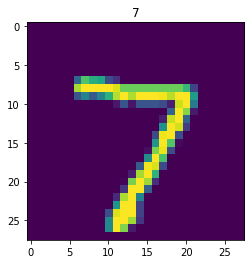

In [10]:
# predictions = (model.predict(X_test) > 0.5).astype("int32")
finalArray = np.argmax(model.predict(X_test), axis=-1)
print(finalArray)
plt.imshow(X_test[0])
plt.title(y_test[0])
filename = 'model.h5'
# filename = 'offlineModel.h5'
model.save(filename)


10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

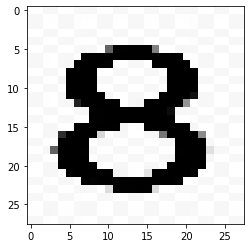

ValueError: Error when checking input: expected flatten_input to have 3 dimensions, but got array with shape (1, 28, 28, 1)

In [17]:
# from keras.models import load_model
# model2=keras.models.load_model("offlineModel.h5py")
#this is how we load the already saved model
# model2.evaluate(X_test,y_test)

model = tf.keras.models.load_model("model.h5")
file = "download.png"
model.evaluate(X_test, y_test)

image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (28,28))
image = 255-image          #inverts image. Always gets read inverted.

plt.imshow(image.reshape(28, 28),cmap='Greys')
plt.show()
pred = model.predict(image.reshape(1,28,28,1), batch_size=1)

print(pred.argmax())
